In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from src.process_data import process_data,load_data

In [2]:
df = process_data(fn='data/ripc_rel.csv',normalize='log2_fc')

loading.../home/elijahc/dev/ml_ripc/data/ripc_rel.csv
baseline shape: (73815, 30)

restructuring to longform...
(this may take a while)


/home/elijahc/.pyenv/versions/3.5.2/envs/jupyterlab/lib/python3.5/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/home/elijahc/.pyenv/versions/3.5.2/envs/jupyterlab/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [3]:
df.head()

,Name,Formula,Molecular Weight,variable,value,timepoint,pt,min
0,Oxaloacetic acid,NaN,132.00541,1A,0.0,A,1,0
1,Oxaloacetic acid,NaN,132.00594,1A,0.0,A,1,0
2,Citric acid,NaN,192.02667,1A,0.0,A,1,0
3,Dimethylphosphinic fluoride,NaN,96.01339,1A,0.0,A,1,0
4,alpha-Ketoglutaric acid,NaN,146.02116,1A,0.0,A,1,0


In [10]:
df[df.timepoint=='F'].head()

,Name,Formula,Molecular Weight,variable,value,timepoint,pt,min
11072250,Oxaloacetic acid,NaN,132.00541,1F,0.007426,F,1,8
11072251,Oxaloacetic acid,NaN,132.00594,1F,0.007351,F,1,8
11072252,Citric acid,NaN,192.02667,1F,0.006248,F,1,8
11072253,Dimethylphosphinic fluoride,NaN,96.01339,1F,0.007134,F,1,8
11072254,alpha-Ketoglutaric acid,NaN,146.02116,1F,1.027599,F,1,8


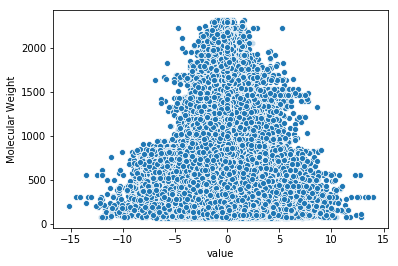

In [11]:
sns.scatterplot(x='value',y='Molecular Weight',data=df[df.timepoint=='F'])

In [57]:
fc_var = df.groupby(['pt','Molecular Weight'],sort=False).agg(['var'])['value'].reset_index()

In [58]:
fc_var.head()

,pt,Molecular Weight,var
0,1,132.00541,3.439694
1,1,132.00594,3.708936
2,1,192.02667,2.368111
3,1,96.01339,2.978859
4,1,146.02116,3.644217


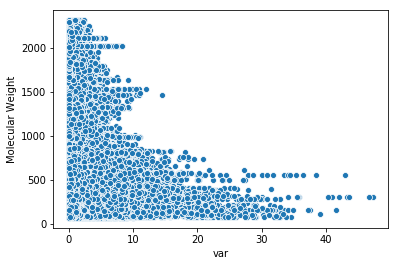

In [60]:
sns.scatterplot(x='var',y='Molecular Weight',data=fc_var)

(array([5.3430e+05, 1.5779e+04, 3.4290e+03, 8.7900e+02, 2.7600e+02,
        9.1000e+01, 2.2000e+01, 9.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([7.00180196e-04, 3.45567820e+00, 6.91065621e+00, 1.03656342e+01,
        1.38206122e+01, 1.72755903e+01, 2.07305683e+01, 2.41855463e+01,
        2.76405243e+01, 3.10955023e+01, 3.45504803e+01]),
 <a list of 10 Patch objects>)

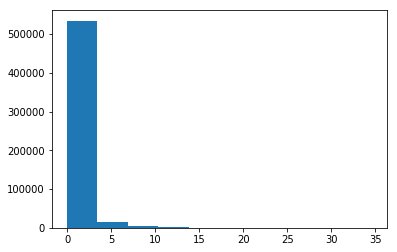

In [39]:
plt.hist(fc_var.values)

In [37]:
fc_var.shape

(554790, 1)